Business case: To predict the winner in pubg game

Type of problem: Regression

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualization library , analysis of data 
import seaborn as sns # visualization library , analysis of data

import warnings     # to remove the warnings in the output
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("pubg.csv") #reading the csv file

In [3]:
df.head() #gives first 5 rows

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape #shape of the dataframe i.e no.of rows and columns

(4446966, 29)

In [5]:
df.columns #gives the column/feature names

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

* DBNOs - Number of enemy players knocked.
* assists - Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* heals - Number of healing items used.
* Id - Player’s Id
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a 8 value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* killStreaks - Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* matchDuration - Duration of match in seconds.
* matchId - ID to identify match. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters.
* teamKills - Number of times this player killed a teammate.
* vehicleDestroys - Number of vehicles destroyed.
* walkDistance - Total distance traveled on foot measured in meters.
* weaponsAcquired - Number of weapons picked up.
* winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [6]:
df.info() #information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
df.describe().T  #statistics of the dataframe

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [8]:
df.describe(include='O').T #categorical value present

,count,unique,top,freq
Id,4446966,4446966,7f96b2f878858a,1
groupId,4446966,2026745,14d6b54cdec6bc,74
matchId,4446966,47965,4b5db40aec4797,100
matchType,4446966,16,squad-fpp,1756186


In [9]:
pd.set_option("display.max_columns", 30)

In [10]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [11]:
print(df.duplicated().sum()) # to check duplicates in the dataset

0


In [12]:
# df.drop_duplicates(keep='first',inplace=True) #drop duplicates in the dataset

In [13]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

## EDA

## Scaling the data

In [16]:
# import sweetviz as sv #  library for univariant analysis
# my_report = sv.analyze(df) ## pass the original dataframe
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [17]:
# # histograms
# df.hist(figsize=(15,20),edgecolor='black')
# # plt.figure()

In [18]:
# sns.histplot(data=df, x="assists", hue="winPoints", multiple="stack", alpha=0.5)

In [19]:
# sns.FacetGrid(df, hue="winPlacePerc", size=5).map(sns.kdeplot,
#                                 "assists").add_legend()
# plt.show()
# #gaussian distribution/normal distribtuion

In [20]:
# # Frequency of Kill Counts
# plt.subplots(figsize=(18,7))
# sns.countplot(df['kills']).set_title("Kill Counts")

In [21]:
# # Frequency of Kill Counts
# plt.subplots(figsize=(18,7))
# sns.countplot(df['assists']).set_title("assists")

In [22]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [23]:
# # Frequency of Kill Counts
# plt.subplots(figsize=(18,7))
# sns.countplot(df['boosts']).set_title("boosts")

In [24]:
# # Frequency of Kill Counts
# plt.subplots(figsize=(18,7))
# sns.countplot(df['damageDealt']).set_title("damageDealt")
# plt.show()

In [25]:
# # Frequency of Kill Counts
# plt.subplots(figsize=(18,7))
# sns.countplot(df['DBNOs']).set_title("DBNOs")

In [26]:
# # Frequency of Kill Counts
# plt.subplots(figsize=(18,7))
# sns.countplot(df['headshotKills']).set_title("headshotKills")

In [27]:
# # Frequency of Kill Counts
# plt.subplots(figsize=(18,7))
# sns.countplot(df['heals']).set_title("heals")

In [28]:
# data = df.copy()
# data.loc[df['kills'] > df['kills'].quantile(0.99)] = '8+'
# plt.figure(figsize=(15,8))
# sns.countplot(df['kills'].astype('str').sort_values())
# plt.title("Kill Count",fontsize=14)
# plt.show()

In [29]:
# data = df.copy()
# data = df[df['kills']==0]
# plt.figure(figsize=(15,8))
# plt.title("Damage Dealt by 0 killers",fontsize=15)
# sns.distplot(df['damageDealt'])
# plt.show()

In [30]:
# kills = df.copy()

# kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

# plt.figure(figsize=(15,8))
# sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
# plt.show()

In [31]:
# data = df.copy()
# data = data[data['walkDistance'] < df['walkDistance'].quantile(0.99)]
# plt.figure(figsize=(15,10))
# plt.title("Walking Distance Distribution",fontsize=15)
# sns.distplot(data['walkDistance'])
# plt.show()

In [32]:
# sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=10, ratio=3, color="lime")
# plt.show()

In [33]:
# sns.jointplot(x="winPlacePerc", y="rideDistance",  data=df, height=10, ratio=3, color="lime")
# plt.show()

##### convert object columns to numeric- 'Id', 'groupId', 'matchId'

In [34]:
# plt.figure(figsize = (16,5))
# sns.heatmap(df.drop('winPoints',axis=1).corr(),annot=True,cmap='Blues')

In [35]:
# corr = df.corr()
# f,ax = plt.subplots(figsize=(20, 15))
# sns.heatmap(df.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
# sns.set(font_scale=1.25)
# plt.show()

In [36]:
# from scipy.stats import pearsonr
 
# # Convert dataframe into series
# list1 = df['assists']
# list2 = df['damageDealt']
 
# # Apply the pearsonr()
# corr, _ = pearsonr(list1, list2)
# print('Pearsons correlation: %.3f' % corr)
 

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Id'] = le.fit_transform(df['Id'])
df['groupId'] = le.fit_transform(df['groupId'])
df['matchId'] = le.fit_transform(df['matchId'])
Match_type = df['matchType']
Match_type= pd.get_dummies(Match_type,drop_first=True)

In [38]:
Match_type.head()

,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
df2 = pd.concat([df,Match_type],axis=1)
pd.set_option('display.max_columns',None)

In [40]:
df2.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,2216109,613774,30085,0,0,0.00,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4151025,827822,32751,0,0,91.47,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
df2.drop(['matchType'],axis=1,inplace=True)

In [42]:
df2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,2216109,613774,30085,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4151025,827822,32751,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,532102,843520,3143,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1216707,1340461,45260,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,856521,1757848,20531,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df2)

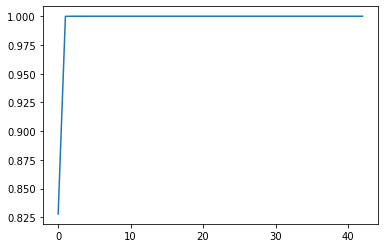

In [44]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [45]:
df2.shape

(4446965, 43)

In [46]:
df2.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'crashtpp', 'duo', 'duo-fpp', 'flarefpp',
       'flaretpp', 'normal-duo', 'normal-duo-fpp', 'normal-solo',
       'normal-solo-fpp', 'normal-squad', 'normal-squad-fpp', 'solo',
       'solo-fpp', 'squad', 'squad-fpp'],
      dtype='object')

In [47]:
pca= PCA(n_components=29)
new_data = pca.fit_transform(df2)
Principal_df= pd.DataFrame(data=new_data, columns=['Id','assists','boosts','damageDealt','DBNOs','headshotKills','heals','killpoints','kills','matchDuration','revives','walkDistance','teamKills','crashtpp', 'duo', 'duo-fpp', 'flarefpp',
       'flaretpp', 'normal-duo', 'normal-duo-fpp', 'normal-solo',
       'normal-solo-fpp', 'normal-squad', 'normal-squad-fpp', 'solo',
       'solo-fpp', 'squad', 'squad-fpp','winPoints'])

In [48]:
Principal_df.shape

(4446965, 29)

In [49]:
 Principal_df.drop_duplicates(keep='first',inplace=True) #drop duplicates in the dataset

In [50]:
Principal_df.shape

(4446965, 29)

In [51]:
Principal_df.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killpoints,kills,matchDuration,revives,walkDistance,teamKills,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp,winPoints
0,-7.317910e+03,399621.571277,6114.479216,-1037.811344,-1355.613448,-627.216580,193.605993,-101.573717,9.991088,-24.602701,7.284298,-17.747425,1.824132,-5.963908,-0.327156,-1.379662,0.067970,0.747597,-0.250986,0.189022,-0.111618,0.475632,-0.026242,0.051747,-0.094245,-0.308431,0.036068,0.014956,-0.010182
1,1.927569e+06,185306.695549,8788.136464,-352.382687,983.184596,568.357297,-220.063300,-30.995696,14.170334,-14.222597,-19.946594,-24.387943,9.894583,3.629858,-1.349034,1.482993,-0.629674,-0.103083,-0.748748,0.082694,-0.361530,0.463327,0.005683,0.058641,-0.133170,-0.145910,0.040668,0.012140,-0.032650
2,-1.691356e+06,170107.887525,-20837.138691,-949.498944,1061.815773,-556.900655,233.608005,-23.437975,3.908499,3.285982,-2.914300,5.135716,-1.730714,-12.978368,-0.528979,-0.628579,-0.137033,1.128508,-0.858141,-0.460225,0.803511,0.019015,-0.289767,0.145312,0.218604,-0.372060,-0.990145,0.132474,-0.027970
3,-1.006820e+06,-326927.589813,21282.500425,-919.151901,1033.083126,-528.184821,108.226302,-58.939584,-28.052235,-50.940601,1.749678,-11.002367,1.100877,10.292572,-0.134662,0.870559,0.051415,-0.079079,-0.175686,0.200732,-0.166829,0.469913,0.031011,-0.028483,-0.150539,-0.017025,0.033143,-0.028543,-0.017231
4,-1.367064e+06,-744264.873237,-3448.809137,-984.996867,1124.114828,-653.544707,133.628101,42.195991,32.560539,59.271441,50.773674,57.485741,-10.382189,-6.452029,-0.401800,-0.560737,-0.471133,-0.475673,-0.176770,-0.097364,0.012028,0.313919,0.085020,-0.307640,0.223962,0.299186,0.160948,0.269596,-0.002829


In [52]:
X= Principal_df
y=df2.winPlacePerc

In [53]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X= scaler.fit_transform(X)
scaled_X

array([[-0.00570051,  0.68313915,  0.44155496, ...,  0.12897507,
         0.06293785, -0.06112666],
       [ 1.50153942,  0.31677534,  0.63463217, ...,  0.1454224 ,
         0.05108466, -0.19600852],
       [-1.31753467,  0.29079351, -1.50474661, ..., -3.54064295,
         0.55746789, -0.16791761],
       ...,
       [ 1.3205673 , -1.33249604, -0.25875842, ...,  0.00450906,
        -0.18316919, -0.11259008],
       [ 1.02884682, -0.89541549,  0.99311484, ...,  0.0838156 ,
         0.01231204, -0.18781634],
       [-1.54850754, -0.17169567, -0.40196698, ...,  0.81653259,
         1.36226413, -0.05092416]])

In [54]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4446965, dtype: float64

In [55]:
# Linear regression

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [58]:
LR_pred = LR.predict(x_test)

In [59]:
LR_pred

array([0.50467003, 0.922273  , 0.94531567, ..., 0.19889443, 0.34356203,
       0.82636963])

In [60]:
from sklearn.metrics  import mean_squared_error, mean_absolute_error, r2_score

In [61]:

print('mean_squared_error:',mean_squared_error(y_test,LR_pred))

print('mean_absolute_error:',mean_absolute_error(y_test,LR_pred))

print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test, LR_pred)))

print('r2_score:',r2_score(y_test,LR_pred))

mean_squared_error: 0.014997339784157208
mean_absolute_error: 0.08914228377174684
root_mean_squared_error: 0.12246362637190362
r2_score: 0.8410742855663536


In [62]:
# from math import sqrt
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error as mse

In [63]:
# depth  =list(range(3,30))
# param_grid =dict(max_depth =depth)
# tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
# tree.fit(x_train,y_train)

In [64]:
# y_train_pred =tree.predict(x_train) 
# y_test_pred =tree.predict(x_test) 

In [65]:
#  r2_score(y_train.values, y_train_pred)

In [66]:
# r2_score(y_test, y_test_pred)

In [67]:
# tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
# random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, 
#                                       scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
# random_regressor.fit(x_train, y_train)

In [68]:
# r2_score(y_train.values, y_train_pred)

In [69]:
# r2_score(y_test, y_test_pred)

In [70]:
# xfinal= r2_score(y_test, y_test_pred)
# xfinal

In [71]:
# Dumping the pickle file
import pickle
# open a file, where you ant to store the data
file = open('PUBG.pkl', 'wb')

# dump information to that file
pickle.dump(LR, file)